# Zillow CSV ETL process

This code serves as a blueprint for the csv ETL process. You will need to update certain field and column names in this report according to the csv file name, the metric and report under consideration, and so on. There are annotations provided throughout to guide you through the code.

In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Declare Variables

In [2]:
#Add inputs here, and clean csv should auto-populate
raw_csv_path = 'Resources_Raw/raw_pct_sold_above_week_all.csv'
clean_csv_path = 'Resources_Clean/clean_pct_sold_above_week_all.csv'
metric_name = 'Units Sold Above List Price (%)'

In [3]:
initial_csv = Path(raw_csv_path)
initial_df = pd.read_csv(initial_csv)
initial_df

,RegionID,SizeRank,RegionName,RegionType,StateName,1/6/18,1/13/18,1/20/18,1/27/18,2/3/18,...,8/5/23,8/12/23,8/19/23,8/26/23,9/2/23,9/9/23,9/16/23,9/23/23,9/30/23,10/7/23
0,102001,0,United States,country,NaN,0.215213,0.207888,0.201854,0.201573,0.193283,...,0.377313,0.375279,0.369453,0.363178,0.360057,0.347347,0.343229,0.337839,0.332790,0.326782
1,394913,1,"New York, NY",msa,NY,0.196429,0.188934,0.227554,0.213710,0.207453,...,0.549730,0.530342,0.571637,0.530482,0.552770,0.545106,0.536510,0.524437,0.526170,0.506284
2,753899,2,"Los Angeles, CA",msa,CA,0.389541,0.355611,0.377079,0.324298,0.358759,...,0.556086,0.573663,0.573941,0.573460,0.564306,0.527660,0.543294,0.538830,0.506444,0.512059
3,394463,3,"Chicago, IL",msa,IL,0.149157,0.155203,0.138723,0.164545,0.150152,...,0.485342,0.490772,0.468047,0.462715,0.470098,0.450586,0.454294,0.426838,0.412628,0.403557
4,394514,4,"Dallas, TX",msa,TX,0.238616,0.219645,0.243839,0.236315,0.256487,...,0.306957,0.279340,0.256881,0.258252,0.268233,0.256662,0.235232,0.227525,0.227190,0.223964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,395086,402,"Sevierville, TN",msa,TN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.111111,0.129032
221,394410,408,"Brainerd, MN",msa,MN,NaN,NaN,NaN,NaN,NaN,...,0.378378,0.366667,0.352941,0.441176,0.442308,0.277778,0.272727,0.297297,0.366667,0.419355
222,394928,410,"Ocean City, NJ",msa,NJ,NaN,NaN,NaN,NaN,NaN,...,0.204082,0.242424,0.192308,0.186047,0.192982,0.367347,0.306122,0.250000,0.219178,0.431373
223,394674,467,"Heber, UT",msa,UT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.147059,0.120000,0.066667,0.037037,0.176471,0.043478


# Remove Nulls from DataFrame

In [4]:
#Checks if any Date column has a null for a given RegionName

#looks at column range from 6th column to last column in df
date_columns_slice = initial_df.iloc[:, 5:-1]

#looks at every row in this column range, and checks for null values
date_range_columns = initial_df.loc[:,date_columns_slice.columns] 
null_check = date_range_columns.isna().any(axis=1)

#Reverse filter based on null check for rows without null
null_check_df = initial_df.loc[~null_check, :]

#Preview
null_check_df

,RegionID,SizeRank,RegionName,RegionType,StateName,1/6/18,1/13/18,1/20/18,1/27/18,2/3/18,...,8/5/23,8/12/23,8/19/23,8/26/23,9/2/23,9/9/23,9/16/23,9/23/23,9/30/23,10/7/23
0,102001,0,United States,country,NaN,0.215213,0.207888,0.201854,0.201573,0.193283,...,0.377313,0.375279,0.369453,0.363178,0.360057,0.347347,0.343229,0.337839,0.332790,0.326782
1,394913,1,"New York, NY",msa,NY,0.196429,0.188934,0.227554,0.213710,0.207453,...,0.549730,0.530342,0.571637,0.530482,0.552770,0.545106,0.536510,0.524437,0.526170,0.506284
2,753899,2,"Los Angeles, CA",msa,CA,0.389541,0.355611,0.377079,0.324298,0.358759,...,0.556086,0.573663,0.573941,0.573460,0.564306,0.527660,0.543294,0.538830,0.506444,0.512059
3,394463,3,"Chicago, IL",msa,IL,0.149157,0.155203,0.138723,0.164545,0.150152,...,0.485342,0.490772,0.468047,0.462715,0.470098,0.450586,0.454294,0.426838,0.412628,0.403557
4,394514,4,"Dallas, TX",msa,TX,0.238616,0.219645,0.243839,0.236315,0.256487,...,0.306957,0.279340,0.256881,0.258252,0.268233,0.256662,0.235232,0.227525,0.227190,0.223964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,845160,198,"Prescott Valley, AZ",msa,AZ,0.200000,0.000000,0.076923,0.122807,0.064516,...,0.166667,0.147541,0.107692,0.142857,0.077922,0.118644,0.102941,0.017241,0.092308,0.163636
176,394361,202,"Barnstable Town, MA",msa,MA,0.153846,0.109375,0.094340,0.113208,0.088235,...,0.364865,0.551020,0.375000,0.384615,0.533333,0.431818,0.467742,0.338235,0.380000,0.340426
193,394380,232,"Bend, OR",msa,OR,0.166667,0.314286,0.137931,0.222222,0.234043,...,0.272727,0.126984,0.125000,0.140845,0.197917,0.185714,0.238806,0.145833,0.169811,0.127273
196,395009,237,"Punta Gorda, FL",msa,FL,0.000000,0.032258,0.125000,0.121212,0.108108,...,0.126316,0.034483,0.128205,0.123596,0.153846,0.178571,0.078652,0.095745,0.104167,0.156250


# Condense Date Columns to Single Column

In this section, we condense the multiple date columns into a single 'date' column. This allows for easier data visualization moving forward.

In [5]:
condensed_rough_df = pd.DataFrame(null_check_df)

new_rows = []

#For loop to iterate through each RegionName
for _, row in condensed_rough_df.iterrows():
    region_ID = row['RegionID']
    size_rank = row['SizeRank']
    region_name = row['RegionName']
    region_type = row['RegionType']
    state_name = row['StateName']
    
    #For loop to iterate through each Date Column within a given RegionName
    for date_column in condensed_rough_df.columns[5:]:
        date = pd.to_datetime(date_column)
        value = row[date_column]
        
        #Add 'Date' and 'value' values for a given Date and Region into new_rows list.
        new_rows.append([region_ID,size_rank,region_name,region_type,state_name, date, value])

#New df based on new_rows 'list'
condensed_df = pd.DataFrame(new_rows, columns=
                             ['Region ID',
                              'Size Rank',
                              'Region Name',
                              'Region Type',
                              'State Name',
                              'Date',
                              metric_name])


#create moving average column for each Region.
window_size = 3 #time period (weeks)
condensed_df[f'{metric_name} Rolling Avg'] = condensed_df.groupby('Region Name')[metric_name].rolling(window=window_size).mean().reset_index(level=0, drop=True)

#preview df
condensed_df

,Region ID,Size Rank,Region Name,Region Type,State Name,Date,Units Sold Above List Price (%),Units Sold Above List Price (%) Rolling Avg
0,102001,0,United States,country,NaN,2018-01-06,0.215213,NaN
1,102001,0,United States,country,NaN,2018-01-13,0.207888,NaN
2,102001,0,United States,country,NaN,2018-01-20,0.201854,0.208318
3,102001,0,United States,country,NaN,2018-01-27,0.201573,0.203772
4,102001,0,United States,country,NaN,2018-02-03,0.193283,0.198903
...,...,...,...,...,...,...,...,...
28891,394685,289,"Homosassa Springs, FL",msa,FL,2023-09-09,0.104167,0.122442
28892,394685,289,"Homosassa Springs, FL",msa,FL,2023-09-16,0.142857,0.129125
28893,394685,289,"Homosassa Springs, FL",msa,FL,2023-09-23,0.148936,0.131987
28894,394685,289,"Homosassa Springs, FL",msa,FL,2023-09-30,0.086207,0.126000


# Analysis Testing

Section I created to test initial clean dataframe. Use only as a referance for chart output.

In [6]:
MSA_filter = ['United States','New York, NY','Los Angeles, CA','Chicago, IL','Dallas, TX']

short_table = condensed_df['Region Name'].isin(MSA_filter)
filtered_df = condensed_df[short_table]

filtered_df

,Region ID,Size Rank,Region Name,Region Type,State Name,Date,Units Sold Above List Price (%),Units Sold Above List Price (%) Rolling Avg
0,102001,0,United States,country,NaN,2018-01-06,0.215213,NaN
1,102001,0,United States,country,NaN,2018-01-13,0.207888,NaN
2,102001,0,United States,country,NaN,2018-01-20,0.201854,0.208318
3,102001,0,United States,country,NaN,2018-01-27,0.201573,0.203772
4,102001,0,United States,country,NaN,2018-02-03,0.193283,0.198903
...,...,...,...,...,...,...,...,...
1500,394514,4,"Dallas, TX",msa,TX,2023-09-09,0.256662,0.261049
1501,394514,4,"Dallas, TX",msa,TX,2023-09-16,0.235232,0.253376
1502,394514,4,"Dallas, TX",msa,TX,2023-09-23,0.227525,0.239806
1503,394514,4,"Dallas, TX",msa,TX,2023-09-30,0.227190,0.229982


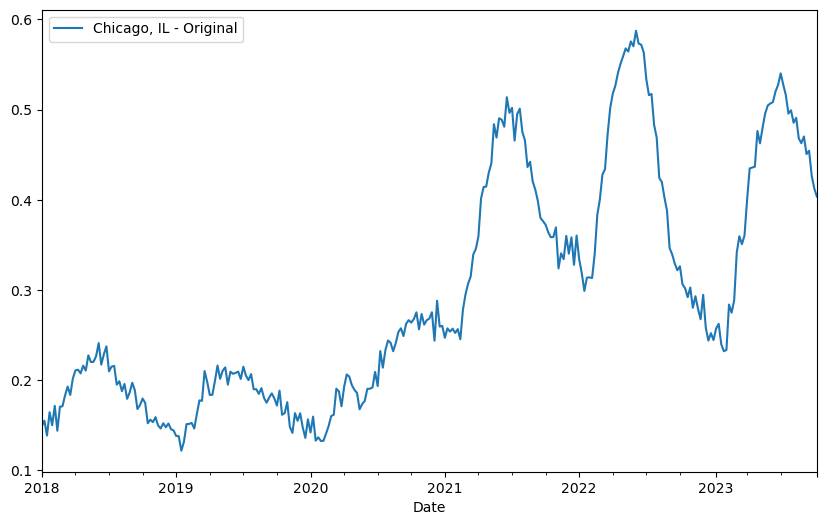

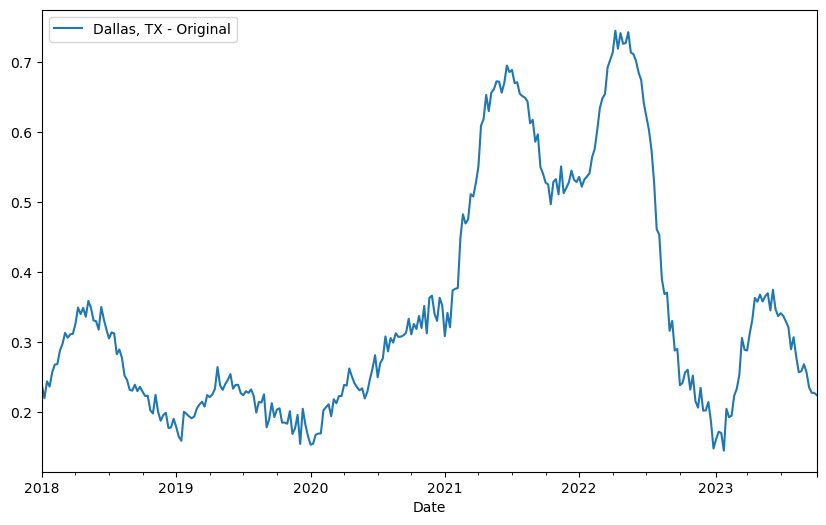

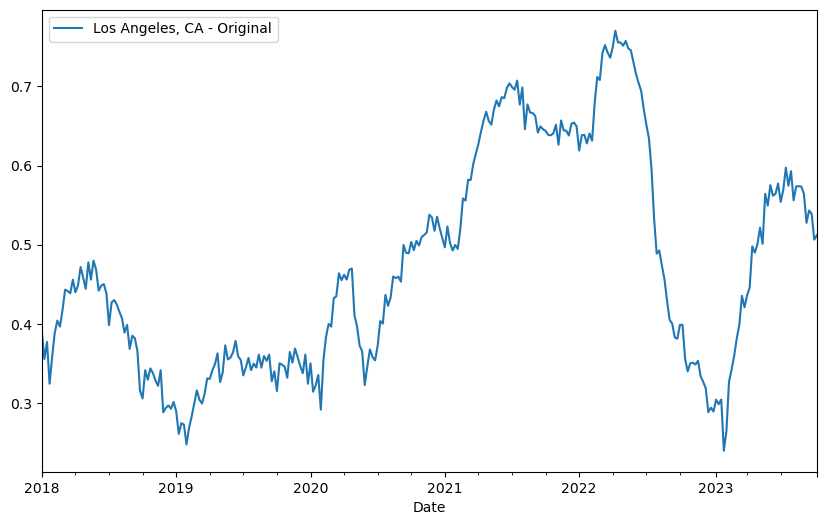

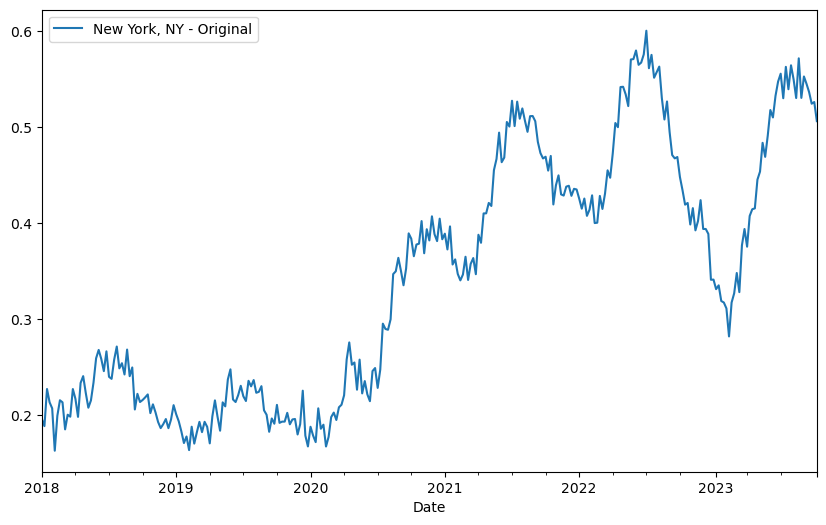

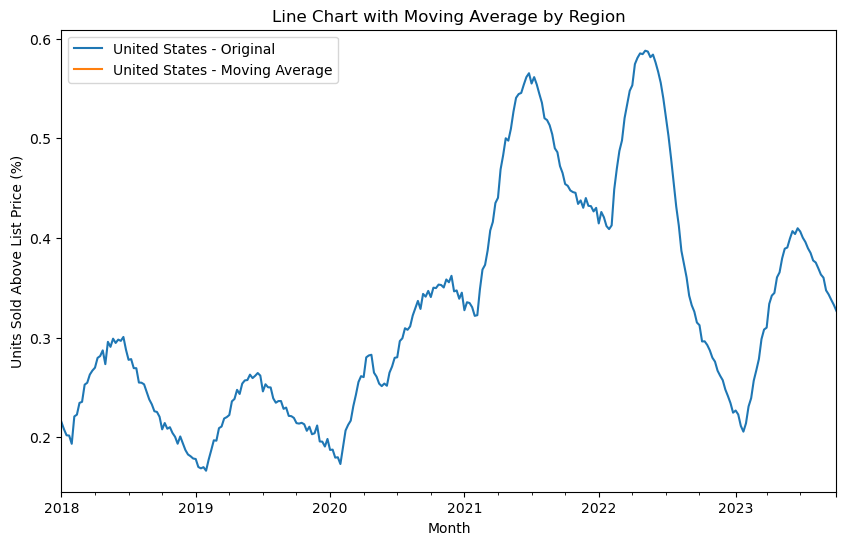

In [7]:
window_size = 3

for region, data in filtered_df.groupby('Region Name'):
    data.plot(kind='line', x='Date', y=metric_name, label=f'{region} - Original', figsize=(10, 6))
    plt.plot(data['Date'], data[f'{metric_name} Rolling Avg'], label=f'{region} - Moving Average')

    
plt.title('Line Chart with Moving Average by Region')
plt.xlabel('Month')
plt.ylabel(metric_name)
plt.legend()
plt.show()

# Generate Clean CSV File

In [8]:
#IMPORTANT -- CHANGE CSV OUTPUT NAME RELEVANT REPORT
condensed_df.to_csv(clean_csv_path, index=False)